In [1]:
import plotly.express as px

from PHYS247 import DataProcessor, DataVisualizer, FeatureSelector, MLModel

In [2]:
pwd

'c:\\Users\\hamed\\OneDrive\\Hamed\\GitHub\\PHYS247'

## Clean Data

Dropped 0 duplicate records
The given dataset is larger skewed towards satified customers showing a 96.04 % observation
Remove 34 columns with constant values
Number of columns before removing the duplicates is: 337
Number of columns after removing the duplicates is: 308


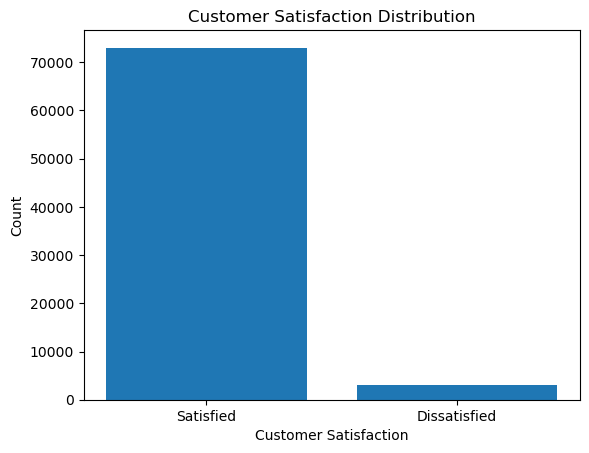

In [2]:
path = './data/train.csv'

Processor = DataProcessor(path)
Processor.clean_data()

## Split and Scale Data

In [3]:
# break up data into training and testing sets
Processor.partition_data()

# assign variables to the training and testing data  
# for future use
X_train, Y_train, X_test, Y_test = Processor.scale_features()

Train data shape: (60816, 369)
Test data shape: (15204, 369)


## Feature Selection

In [4]:
clean_df = Processor.df_clean
clean_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var25_0,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var33_0,ind_var33,ind_var34_0,ind_var37_cte,ind_var37_0,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var44_0,ind_var44,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var25_0,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var33_0,num_var33,num_var34_0,num_var35,num_var37_med_ult2,num_var37_0,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var42_0,num_var42,num_var44_0,num_var44,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var42,saldo_var44,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_venta_var44_1y3,imp_amort_var18_ult1,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_aport_var13_hace3,num_aport_var13_ult1,num_aport_var17_hace3,num_aport_var17_ult1,num_aport_var33_hace3,num_aport_var33_ult1,num_var7_emit_ult1,num_var7_recib_ult1,num_compra_var44_hace3,num_compra_var44_ult1,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_med_var45_ult3,num_meses_var5_ult3,num_meses_var8_ult3,num_meses_var12_ult3,num_meses_var13_corto_ult3,num_meses_var13_largo_ult3,num_meses_var13_medio_ult3,num_meses_var17_ult3,num_meses_var29_ult3,num_meses_var33_ult3,num_meses_var39_vig_ult3,num_meses_var44_ult3,num_op_var39_comer_ult1,num_op_var39_comer_ult3,num_op_var40_comer_ult1,num_op_var40_comer_ult3,num_op_var40_efec

In [5]:
len(clean_df.columns)-2

306

### Random Forest Selection

In [7]:
# # SKIP THIS CELL
# X = clean_df.drop(columns=['ID', 'TARGET'])
# Y = clean_df[['TARGET']]
# top_n = 20

# Selector = FeatureSelector(X)
# Selector.random_forest_selection(n = top_n, Y=Y)
# Selector.feature_importance_df

c:\Users\hamed\miniconda3\envs\hamed\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,Feature,Importance
0,var38,0.382406
1,var15,0.174277
2,saldo_medio_var5_ult3,0.029263
3,saldo_medio_var5_hace3,0.028696
4,num_var45_ult3,0.020388
5,saldo_medio_var5_hace2,0.017385
6,num_var45_hace3,0.016463
7,saldo_var30,0.015690
8,saldo_var42,0.015222
9,num_var45_hace2,0.014759


In [13]:
# # SKIP THIS CELL
# fig = px.bar(Selector.feature_importance_df, x='Importance', y='Feature', orientation='h',
#              title=f'Top {top_n} Feature Importances',
#              labels={'Importance': 'Importance', 'Feature': 'Feature'})

# # sort from most to least important
# fig.update_yaxes(categoryorder='total ascending')
# # keep all labels
# fig.update_yaxes(tickmode='linear')

# fig.show()

In [8]:
# redo the data splitting with the selected features
# feature_cols = Selector.feature_importance_df['Feature'].values

# X = clean_df[feature_cols]
# Y = clean_df[['TARGET']]

# Processor.partition_data(X, Y)

# X_train = Processor.X_train
# Y_train = Processor.Y_train
# X_test = Processor.X_test
# Y_test = Processor.Y_test

Train data shape: (60816, 20)
Test data shape: (15204, 20)


### PCA

In [6]:
# only perform PCA after splittling the data
selector = FeatureSelector(X = X_train)  

# Retain 95% of the variance
selector.PCA(retain = 0.95, X_test = X_test)
selector.explained_variance

Explained variance by each component: [0.08473886 0.05422472 0.03859101 0.03630076 0.03564078 0.03215527
 0.03079591 0.03002864 0.0275952  0.02485427 0.02351284 0.02245048
 0.02177632 0.02070101 0.02009842 0.01708345 0.01616832 0.01435784
 0.01365613 0.01343959 0.01288863 0.01235183 0.01131066 0.01115403
 0.01093153 0.01072977 0.01050236 0.01025123 0.01000849 0.00955014
 0.00941155 0.00913684 0.00910293 0.00874185 0.00830658 0.0074161
 0.00715991 0.00695441 0.0068103  0.00653319 0.0064622  0.00635191
 0.00625426 0.00613749 0.00604936 0.00602043 0.00576844 0.0053961
 0.0053221  0.00460205 0.00444084 0.00436348 0.00432889 0.00426589
 0.00416722 0.00404632 0.00392827 0.00383393 0.00381511 0.00362269
 0.00354397 0.00338786 0.00319769 0.00314372 0.00310895 0.00308904
 0.00305092 0.00296647 0.00294632 0.00287794 0.00276288 0.00268417
 0.00257734 0.00253904 0.00246996 0.00245324 0.00240162 0.00233447
 0.00228488 0.00226344 0.00220062 0.00219221 0.00216117 0.00212991
 0.00208902 0.00206318 0.0

array([0.08473886, 0.05422472, 0.03859101, 0.03630076, 0.03564078,
       0.03215527, 0.03079591, 0.03002864, 0.0275952 , 0.02485427,
       0.02351284, 0.02245048, 0.02177632, 0.02070101, 0.02009842,
       0.01708345, 0.01616832, 0.01435784, 0.01365613, 0.01343959,
       0.01288863, 0.01235183, 0.01131066, 0.01115403, 0.01093153,
       0.01072977, 0.01050236, 0.01025123, 0.01000849, 0.00955014,
       0.00941155, 0.00913684, 0.00910293, 0.00874185, 0.00830658,
       0.0074161 , 0.00715991, 0.00695441, 0.0068103 , 0.00653319,
       0.0064622 , 0.00635191, 0.00625426, 0.00613749, 0.00604936,
       0.00602043, 0.00576844, 0.0053961 , 0.0053221 , 0.00460205,
       0.00444084, 0.00436348, 0.00432889, 0.00426589, 0.00416722,
       0.00404632, 0.00392827, 0.00383393, 0.00381511, 0.00362269,
       0.00354397, 0.00338786, 0.00319769, 0.00314372, 0.00310895,
       0.00308904, 0.00305092, 0.00296647, 0.00294632, 0.00287794,
       0.00276288, 0.00268417, 0.00257734, 0.00253904, 0.00246

In [7]:
X_train_pca = selector.X_train_pca
X_test_pca = selector.X_test_pca

## Train Models

In [8]:
# train the models
ml_model = MLModel(X_train_pca, Y_train, X_test_pca, Y_test)

ml_model.logistic_regression()
ml_model.random_forest()
ml_model.decision_tree()
# ml_model.svm()
ml_model.xgboost()
ml_model.neural_network()

Assessing logistic_regression model
Assessing random_forest model
Assessing decision_tree model
Assessing xgboost model
Assessing neural_network model


c:\Users\hamed\miniconda3\envs\hamed\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
import pandas as pd

data = dict(ml_model.model_performance)
df = pd.DataFrame(data)
df

,logistic_regression,random_forest,decision_tree,xgboost,neural_network
y_true,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
prediction,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
accuracy,0.960142,0.958564,0.848724,0.958892,0.956656
precision,0.333333,0.266667,0.087464,0.129032,0.139241
recall,0.006645,0.026578,0.299003,0.006645,0.018272
f1,0.013029,0.048338,0.135338,0.012638,0.032305
roc_auc,0.503048,0.511782,0.585195,0.502398,0.506808
log_loss,1.436625,1.493522,5.452539,1.481668,1.562271
classification_report,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...


## Evaluate Models

In [11]:
df.to_clipboard(index=True)

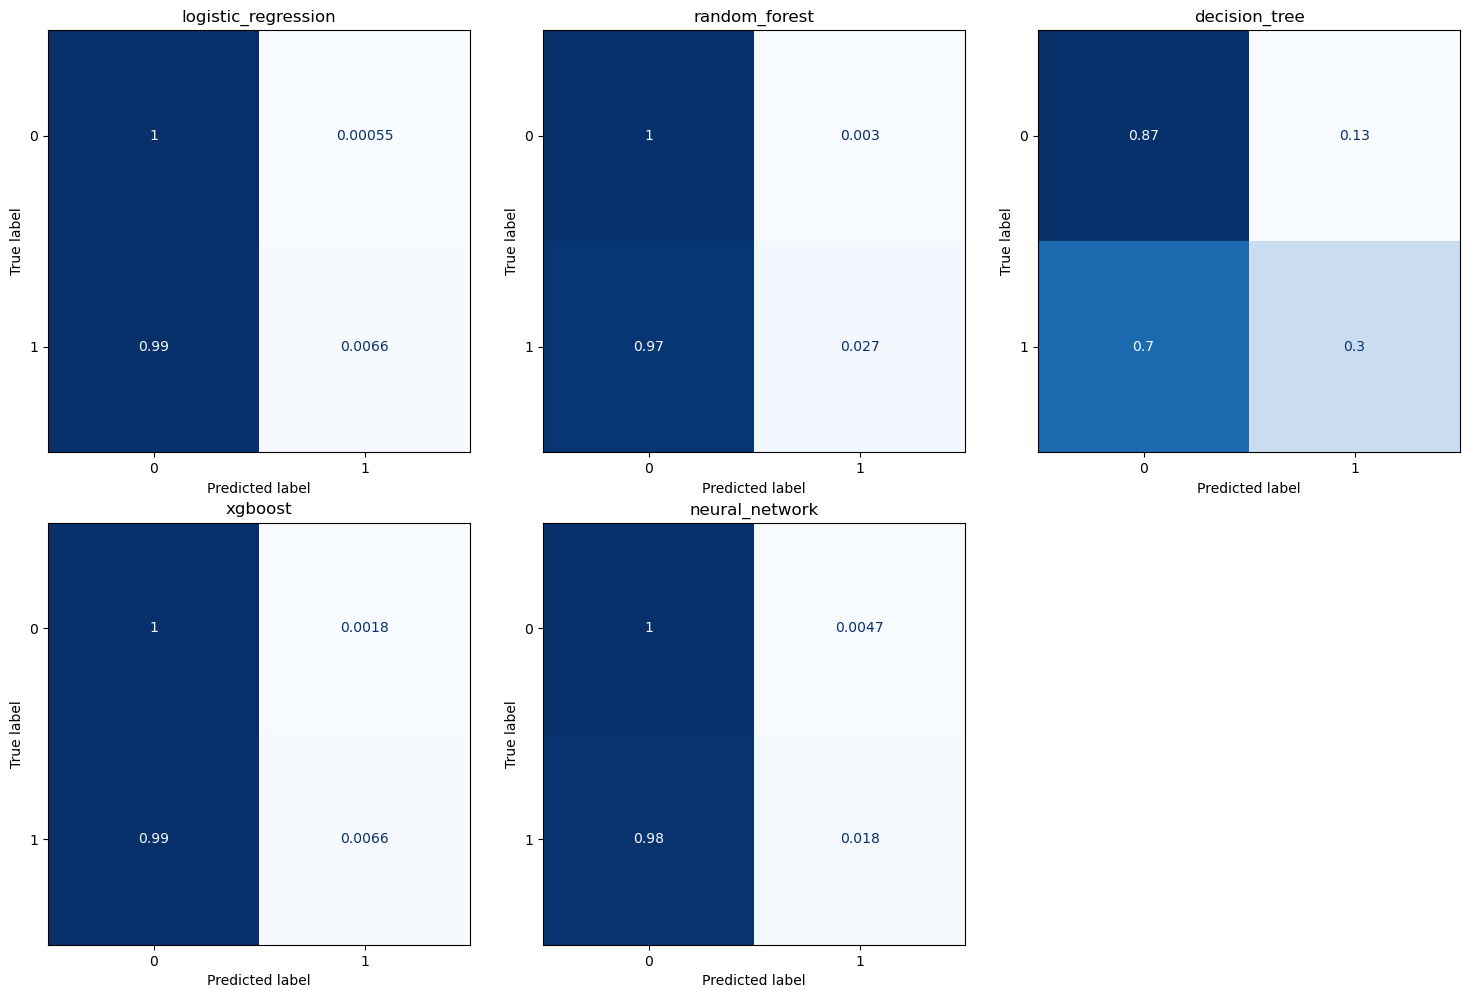

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# confusion matrices for all models
models = df.columns

y_true = df.loc['y_true', models]
predictions = df.loc['prediction', models]

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, model in enumerate(models):
    y_true_model = y_true[model]
    y_pred_model = predictions[model]
    
    cm = confusion_matrix(y_true_model, y_pred_model, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[idx], cmap='Blues', colorbar=False)
    axes[idx].set_title(model)

# Hide any extra subplots (if number of models is less than 6)
for i in range(len(models), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Hyperparameter Tuning

In [20]:
# Too computationally expensive to run
# Ran overnight and still did not finish
# ml_model.logistic_regression(grid=True)
# ml_model.random_forest(grid=True)
# ml_model.decision_tree(grid=True)
# ml_model.xgboost(grid=True)
# ml_model.neural_network(grid=True)

# data = dict(ml_model.model_performance)
# df = pd.DataFrame(data)
# df

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['entropy'],
    'max_depth': [3, 6, 9],
    'min_samples_leaf': [3, 6, 9],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0, class_weight='balanced'), param_grid, cv=5, scoring='f1')
model = grid_search.fit(X_train_pca, Y_train)


In [49]:
print(f'{model.best_score_}')
print(f'{model.best_params_}')
print(f'{model.best_estimator_}')

0.1791150692845562
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 3}
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features='sqrt', min_samples_leaf=3,
                       random_state=0)


In [28]:
from sklearn.metrics import confusion_matrix, f1_score

# rerun tuned model
model = DecisionTreeClassifier(
    criterion = 'entropy',
    max_depth = 3,
    max_features = 'sqrt',
    min_samples_leaf = 3,
    class_weight='balanced',
    random_state=42
)
model = model.fit(X_train_pca, Y_train)

print(model.score(X_test_pca, Y_test))
print(model.feature_importances_.shape)
print(model.feature_importances_)

prediction = model.predict(X_test_pca)
print(f1_score(Y_test, prediction))

0.8061694290976059
(95,)
[0.         0.49906212 0.05103614 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.05845275 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.03275155 0.12139751 0.         0.         0.
 0.         0.23729994 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
0.1874827681279294


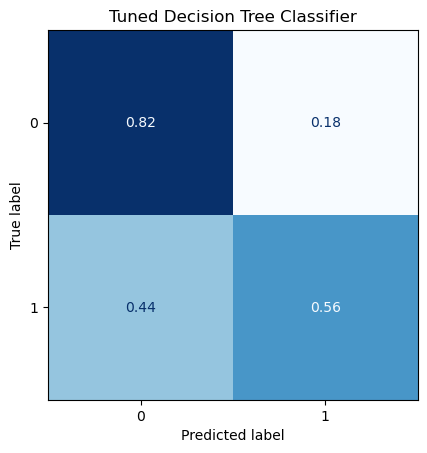

In [29]:
# display the confusion matrix
cm = confusion_matrix(Y_test, prediction, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', colorbar=False)
plt.title('Tuned Decision Tree Classifier')
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier

# rerun tuned model
model = RandomForestClassifier(
    criterion = 'entropy',
    max_depth = 3,
    max_features = 'sqrt',
    min_samples_leaf = 3,
    class_weight='balanced',
    random_state=42
)
model = model.fit(X_train_pca, Y_train)

print(model.score(X_test_pca, Y_test))
print(model.feature_importances_.shape)
print(model.feature_importances_)

prediction = model.predict(X_test_pca)
print(f1_score(Y_test, prediction))

0.8233359642199422
(95,)
[0.034467   0.02973506 0.01478584 0.02372998 0.00586976 0.02827466
 0.04954028 0.00946884 0.00463936 0.00171991 0.00604221 0.01836833
 0.01011626 0.01486132 0.00338159 0.01551123 0.06395911 0.00861314
 0.02728945 0.03204661 0.00457322 0.00137173 0.01548163 0.00760057
 0.01417101 0.00043096 0.00076077 0.00126615 0.00040208 0.00074553
 0.03173863 0.01514639 0.00423132 0.00189993 0.0005619  0.00269918
 0.         0.00267663 0.00249649 0.00060792 0.00898982 0.0674859
 0.00792982 0.00300395 0.         0.0010682  0.00044536 0.0024223
 0.00297245 0.00386884 0.0024932  0.00068662 0.00482326 0.00206099
 0.0181014  0.0002047  0.00354452 0.00160399 0.00192093 0.00652987
 0.0025839  0.00040467 0.00209652 0.00316184 0.00072682 0.00565118
 0.00286896 0.00032389 0.0209077  0.00368682 0.03028561 0.
 0.00534747 0.014945   0.00081323 0.00062779 0.00111171 0.01602212
 0.00013258 0.04267652 0.05461592 0.01522834 0.01608906 0.01389788
 0.03001332 0.00057668 0.03741576 0.00262899 0.

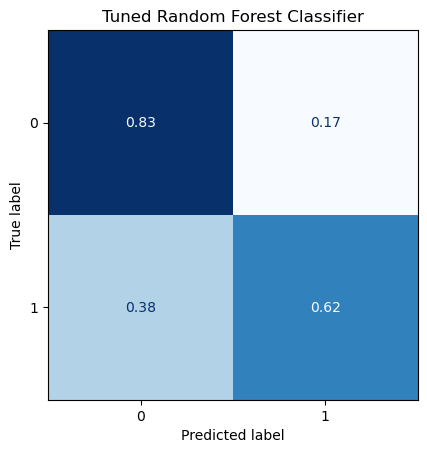

In [26]:
cm = confusion_matrix(Y_test, prediction, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', colorbar=False)
plt.title('Tuned Random Forest Classifier')
plt.show()

Receiver Operating Characteristic Curve

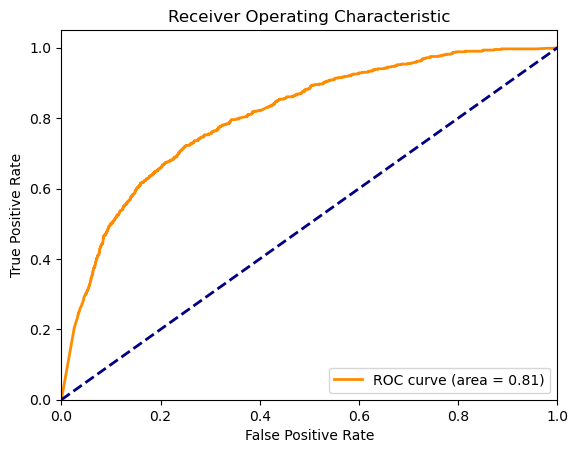

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have the true labels and predicted probabilities
y_true = Y_test  # Replace with your actual test labels
y_proba = model.predict_proba(X_test_pca)[:, 1]  # Predicted probabilities for the positive class

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_proba)
roc_auc = roc_auc_score(y_true, y_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


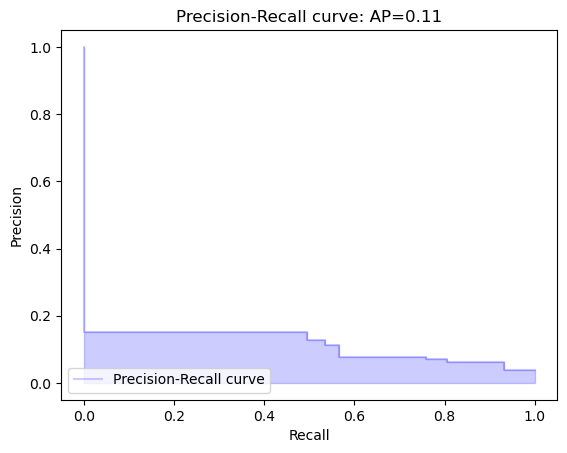

In [60]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall curve and average precision score
precision, recall, _ = precision_recall_curve(y_true, y_proba)
average_precision = average_precision_score(y_true, y_proba)

# Plot Precision-Recall curve
plt.figure()
plt.step(recall, precision, where='post', color='b', alpha=0.2, label='Precision-Recall curve')
plt.fill_between(recall, precision, alpha=0.2, color='b', step='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.legend(loc='lower left')
plt.show()


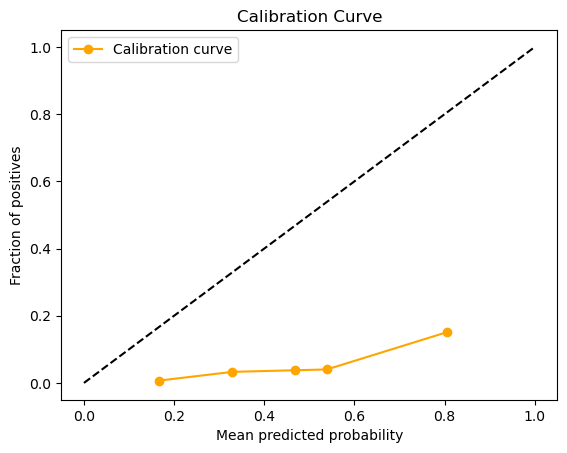

In [61]:
from sklearn.calibration import calibration_curve

# Compute calibration curve
prob_true, prob_pred = calibration_curve(y_true, y_proba, n_bins=10)

# Plot calibration curve
plt.figure()
plt.plot(prob_pred, prob_true, marker='o', color='orange', label='Calibration curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend(loc='upper left')
plt.show()


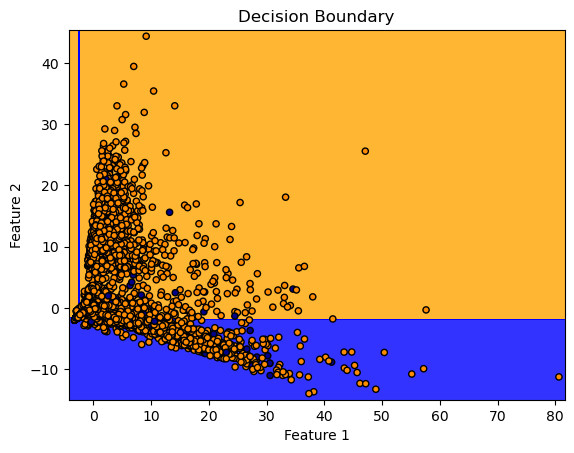

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Ensure you have exactly two features for visualization
# Use your original data with exactly two features for X_train and X_test
X_train_2d = X_train_pca[:, :2]  # Use the first two features for simplicity
X_test_2d = X_test_pca[:, :2]  # Use the first two features for simplicity

# Train the model again if necessary using only two features
model.fit(X_train_2d, Y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_test_2d[:, 0].min() - 1, X_test_2d[:, 0].max() + 1
y_min, y_max = X_test_2d[:, 1].min() - 1, X_test_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('orange', 'blue')))
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=Y_test, edgecolor='k', s=20, cmap=ListedColormap(('darkorange', 'darkblue')))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()
